<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    BBC News Classification Kaggle Mini-Project
</div>

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Loading Libraries
</div>

In [1]:
# ! pip3 install wordcloud
# ! pip3 install nltk


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')

from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehdiafiatpour/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div style="background-color: blue; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Step 1 - Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)
</div>

### Extracting Word Features and Exploratory Data Analysis (EDA)

1. **Inspect, Visualize, and Clean the Data (15 pts)**  
    Perform exploratory data analysis to inspect the dataset, visualize patterns, and clean the data.

2. **Visualizations**  
    Include visualizations such as histograms, boxplots, and word clouds to better understand the data distribution and characteristics. Describe any data cleaning procedures applied, such as removing duplicates or handling missing values.

3. **Word Embedding Methods**  
    Explore methods to process raw text into feature vectors, such as:
    - **TF-IDF**: Emphasizes important words while downweighting common ones.
    - **GloVe**: Captures semantic relationships between words using co-occurrence statistics.
    - **Word2Vec**: Generates word embeddings based on context using neural networks.

    Briefly explain the chosen method(s) and how they work in your own words. Perform exploratory data analysis, including word statistics and visualizations.

4. **Research and Understanding**  
    As NLP-specific techniques like word embeddings were not covered in lectures, refer to online resources (e.g., Kaggle discussions, research papers) to understand these methods. Demonstrate your understanding through explanations, discussions, and interpretations. Include a reference list at the end of the report.

5. **Importance of Automated News Classification**  
    Automated news classification plays a critical role in the digital era, enabling users to access articles quickly and efficiently. This project aims to explore methods for classifying news articles effectively.

<div style="background-color: green; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    EDA and Data Preprocessing
</div>

<div style="background-color: #005f99; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Data Overview
</div>

## 1. Data Files and Loading the Datasets

In [3]:
# Data files

train_file = "./data/BBC News Train.csv"
test_file = "./data/BBC News Test.csv"

In [4]:
# Load the datasets

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [5]:
# Display Train and Test datasets information

print('Train dataset shape:', train_df.shape)
print('Test dataset shape:', test_df.shape)
print('Train dataset columns:', train_df.columns.tolist())
print('Test dataset columns:', test_df.columns.tolist())

Train dataset shape: (1490, 3)
Test dataset shape: (735, 2)
Train dataset columns: ['ArticleId', 'Text', 'Category']
Test dataset columns: ['ArticleId', 'Text']


In [6]:
# Display the first few rows of the train dataset

print('Train dataset head: \n')
train_df.head()

Train dataset head: 



,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
# Display the first few rows of the test dataset

print('Test dataset head: \n')
test_df.head()

Test dataset head: 



,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [8]:
# Display the columns information of the train dataset

print('Columns info: \n')
train_df.info()

Columns info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [9]:
# Display the number of rows and columns in the train and test datasets

print(f'Number of train dataset rows: {train_df.shape[0]}, columns: {train_df.shape[1]}')
print(f'Number of test dataset rows: {test_df.shape[0]}, columns: {test_df.shape[1]}')

Number of train dataset rows: 1490, columns: 3
Number of test dataset rows: 735, columns: 2


In [10]:
# Check for missing values in the train dataset

print("Checking for missing values in each column: \n")
train_df.isnull().sum()

Checking for missing values in each column: 



ArticleId    0
Text         0
Category     0
dtype: int64

## 2. Ploting the Distribution of categories in the dataset

In [11]:
# Function to plot the distribution of categories in the dataset

def plot_categories_distribution(df):
    category_counts = df['Category'].value_counts()
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='#005f99', alpha=0.8, edgecolor='black')
    plt.title('Distribution of Categories in News Articles', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

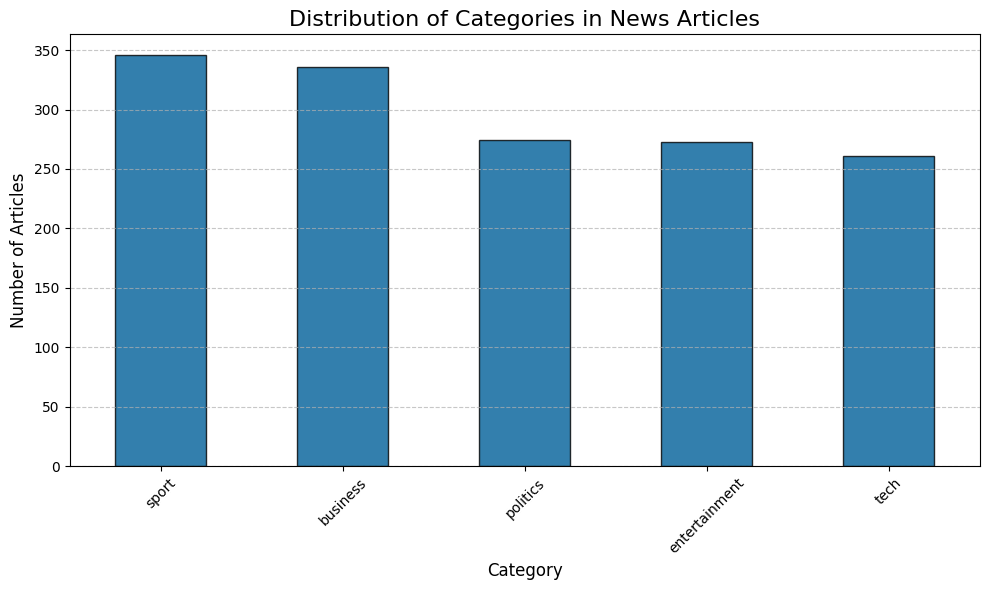

In [12]:
plot_categories_distribution(train_df)

#### The most popular categories are business and sport. Based on the histogram, the training dataset is reasonably balanced, though not perfectly. Therefore, no adjustments will be made to balance the categories. 

## 3. Data Cleaning - Removing Null Data and Duplicates and Plot Updated Data

In [13]:
# Check for duplicates in the train dataset
print("Checking for duplicates in the train dataset: \n")

duplicates = train_df[train_df.duplicated(subset=['Text'], keep=False)].sort_values(by='Text')
duplicates

Checking for duplicates in the train dataset: 



,ArticleId,Text,Category
494,1326,ask jeeves joins web log market ask jeeves has...,tech
228,1098,ask jeeves joins web log market ask jeeves has...,tech
1430,1042,aviator creator in oscars snub the man who s...,entertainment
695,374,aviator creator in oscars snub the man who s...,entertainment
443,1847,blind student hears in colour a blind studen...,tech
...,...,...,...
1047,789,virus poses as christmas e-mail security firms...,tech
1409,957,web radio takes spanish rap global spin the ra...,tech
616,110,web radio takes spanish rap global spin the ra...,tech
63,2017,what high-definition will do to dvds first it ...,tech


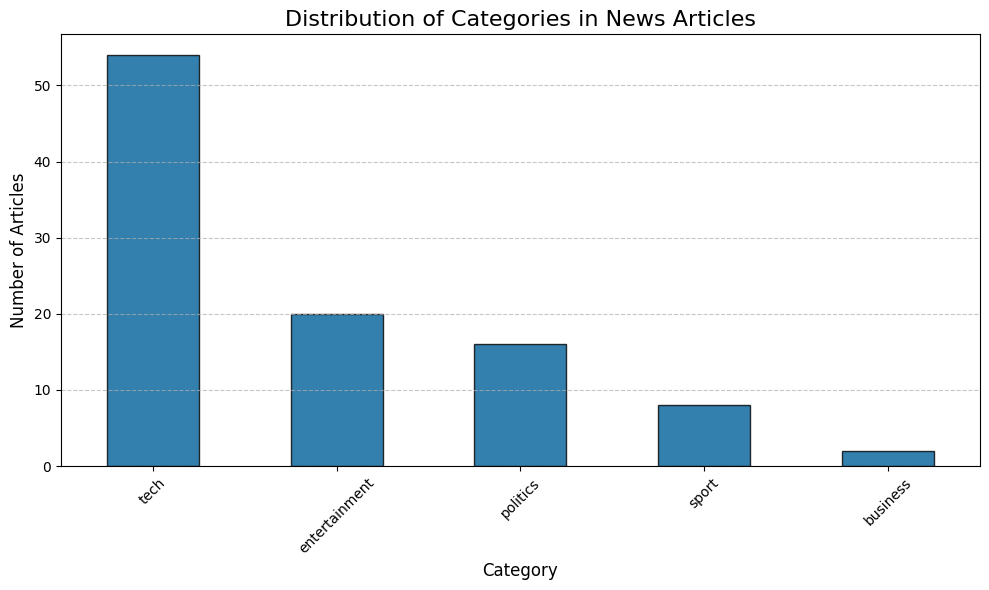

In [14]:
# Plot the distribution of categories in the dataset with duplicates highlighted

plot_categories_distribution(duplicates)

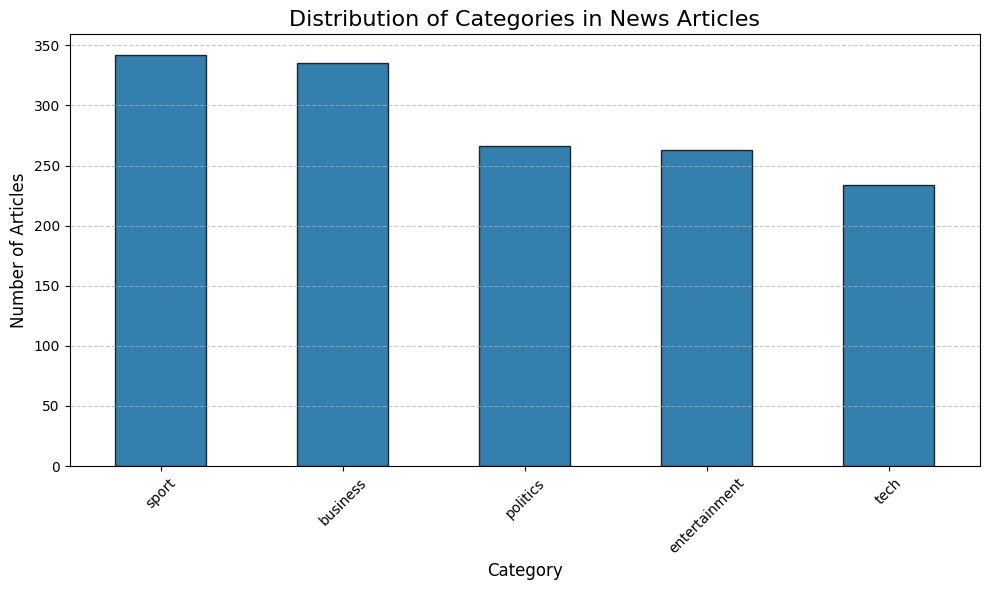

In [15]:
# Remove duplicates from the train dataset

train_df = train_df.drop_duplicates(subset=['Text'])
plot_categories_distribution(train_df)

## 4. Data Processing

In [16]:
def pre_process(df):
    reviews = []
    stopwords_set = set(stopwords.words("english"))
    ps = PorterStemmer()
    for p in tqdm(df['Text']):
        # convert to lowercase 
        p = p.lower()
        # remove punctuation and additional empty strings
        p = ''.join([c for c in p if c not in punctuation])
        reviews_split = p.split()
        reviews_wo_stopwords = [word for word in reviews_split if not word in stopwords_set]
        reviews_stemm = [ps.stem(w) for w in reviews_wo_stopwords]
        p = ' '.join(reviews_stemm)
        reviews.append(p)
    return reviews

In [17]:

train_df['Text_pp'] = pre_process(train_df)
test_df['Text_pp'] = pre_process(test_df)

# compare the same phrase before and after pre-processing
print('Phrase before pre-processing: ', train_df['Text'][0])
print('Phrase after pre-processing: ', train_df['Text_pp'][0])

100%|██████████| 735/735 [00:01<00:00, 506.75it/s]

Phrase before pre-processing:  worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and prac

## 5. Word Cloud Visualization for each category

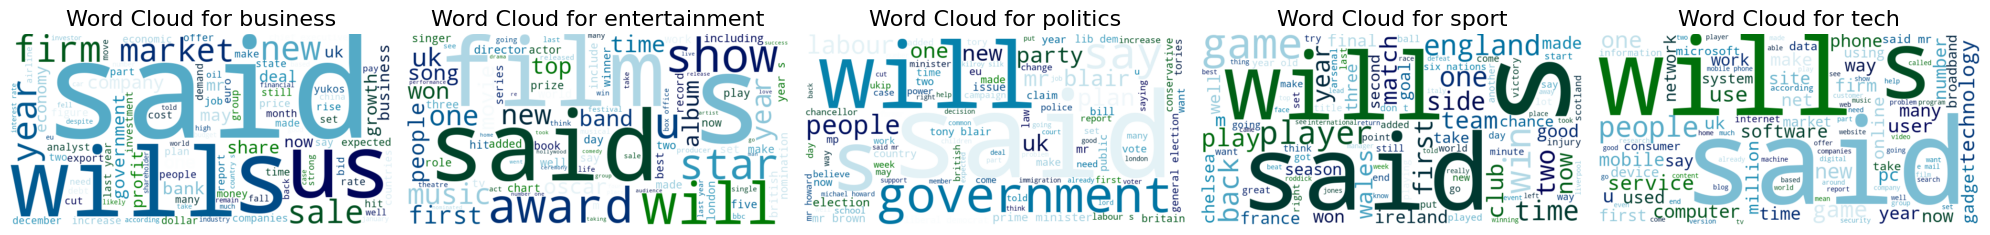

In [18]:
grouped_text = train_df.groupby('Category')['Text'].apply(lambda x: ' '.join(x))

def plot_wordcloud(category, text, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='ocean', max_words=100).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for {category}", fontsize=16)
    ax.axis('off')

fig, axes = plt.subplots(1, len(grouped_text), figsize=(20, 10), sharex=True, sharey=True)

for idx, (category, text) in enumerate(grouped_text.items()):
    plot_wordcloud(category, text, axes[idx])

plt.tight_layout()
plt.show()

## 6. Article Length Distribition

/var/folders/65/n8nz00p96075kkn72cxp3sth0000gn/T/ipykernel_4383/1355603948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Category', y='article_length', palette='ocean')


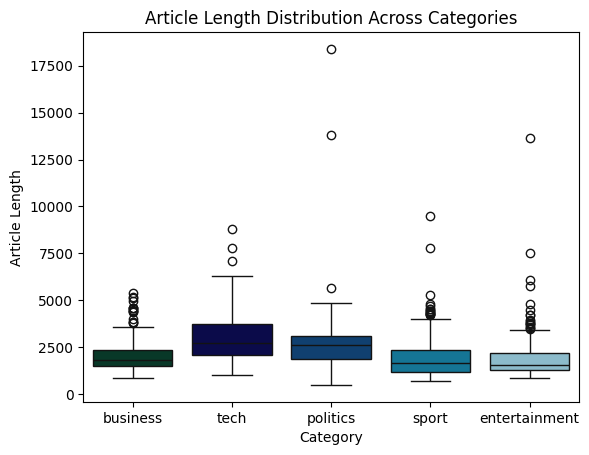

In [19]:
train_df['article_length'] = train_df['Text'].apply(len)
sns.boxplot(data=train_df, x='Category', y='article_length', palette='ocean')
plt.title('Article Length Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Article Length')
plt.show()

## 7. Distribution of Article Lengths Across Categories

Category-wise Article Length Statistics:
                count         mean          std     min      25%     50%  \
Category                                                                  
business       335.0  1983.925373   791.218860   846.0  1482.50  1834.0   
entertainment  263.0  1919.433460  1160.711118   866.0  1310.50  1566.0   
politics       266.0  2630.078947  1462.759758   501.0  1876.25  2601.5   
sport          342.0  1903.005848  1054.683583   719.0  1205.50  1656.5   
tech           234.0  2980.692308  1221.625365  1003.0  2071.75  2738.5   

                   75%      max  
Category                         
business       2341.00   5406.0  
entertainment  2176.50  13619.0  
politics       3105.50  18387.0  
sport          2357.25   9471.0  
tech           3768.50   8826.0  

Most Common Words in Each Category:
business: [('said', 1098), ('year', 570), ('us', 511), ('mr', 394), ('compani', 392), ('firm', 374), ('market', 352), ('would', 308), ('also', 279), ('bank',

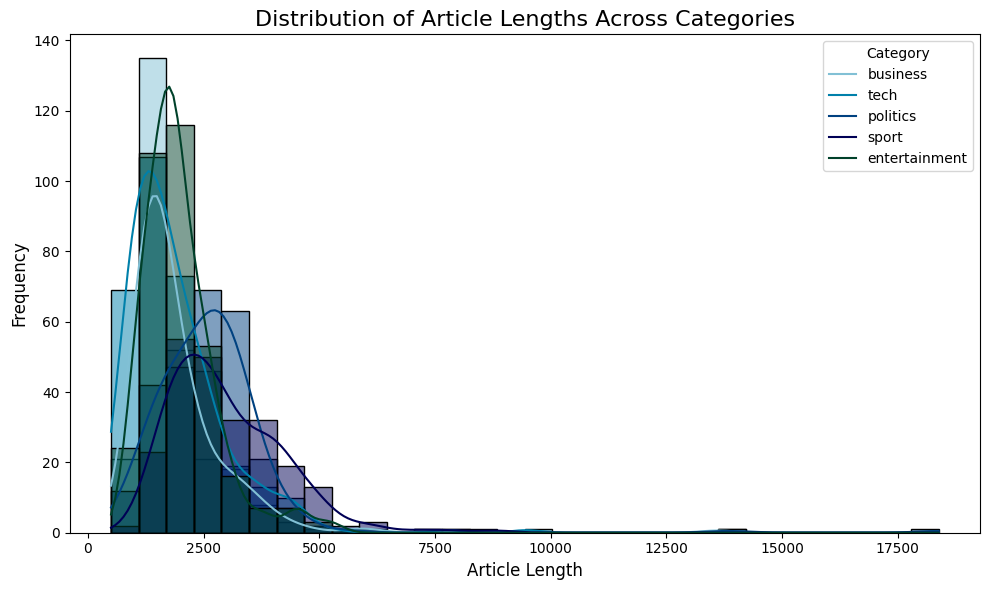

In [20]:
# Additional Analysis: Category-wise Article Length Statistics
category_stats = train_df.groupby('Category')['article_length'].describe()
print("Category-wise Article Length Statistics:\n", category_stats)

# Additional Analysis: Most Common Words in Each Category
def get_most_common_words(text_series, n=10):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

category_common_words = {}
for category, texts in train_df.groupby('Category')['Text_pp']:
    category_common_words[category] = get_most_common_words(texts)

print("\nMost Common Words in Each Category:")
for category, words in category_common_words.items():
    print(f"{category}: {words}")

# Additional Analysis: Distribution of Article Lengths Across Categories
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='article_length', hue='Category', bins=30, kde=True, palette='ocean')
plt.title('Distribution of Article Lengths Across Categories', fontsize=16)
plt.xlabel('Article Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Category', loc='upper right', labels=train_df['Category'].unique())
plt.tight_layout()
plt.show()

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Step 1 - Conclusions & Plan of Analysis
</div>


## Exploratory Data Analysis (EDA) and Plan of Analysis

### **Visualizations**
1. **Category Distribution**: A histogram was plotted to visualize the distribution of news articles across categories. The training dataset is reasonably balanced, with business and sport being the most popular categories.
2. **Word Clouds**: Word clouds were generated for each category to identify frequently used words. These visualizations highlighted category-specific keywords, such as "market" for business and "game" for sport.
3. **Article Length Distribution**: A boxplot was created to analyze the length of articles across categories. Tech and politics articles tend to be longer, with outliers present in all categories.
4. **Distribution of Article Lengths Across Categories**: A histogram was plotted to visualize the distribution of article lengths across categories. The plot revealed that tech and politics articles tend to have longer lengths, while entertainment articles are generally shorter. Outliers were observed in all categories, indicating variability in article lengths.

    #### Summary of Data Set:
    * Train dataset has 1490 rows, 3 columns
    * Test dataset has 735 rows, 2 columns
    * Text and Category have object data type
    * No missing values
    * 5 categories: business, tech, politics, sport, entertaiment
    * Train dataset is more/less balanced
    * Train dataset has duplicates

    #### Common Words & Category-Specific Words

    * **Common Words:** Frequently used words like "said" and "will" are prevalent across all categories.

    * **Category-Specific Words:**

        - **Business:** Terms such as "market" and "economy" emphasize corporate activities and financial discussions.
        - **Entertainment:** Words like "film" and "music" highlight topics related to movies, music, and celebrities.
        - **Politics:** Keywords such as "labor", "election", and "government" reflect discussions around political leaders and elections.
        - **Sport:** Terms like "game" and "england" focus on sports events, players, and competitions.
        - **Tech:** Words such as "user", "software", and "mobile" indicate topics related to technology, innovations, and software development.

    #### Article Length Distribution

    * **Tech** and **politics** articles are generally longer on average compared to other categories.
    * All categories have outliers, with some articles being very long.


#### Data Cleaning Procedures
1. **Remove Duplicates**: Duplicate articles were identified and removed from the training dataset to ensure data quality.
2. **Text Preprocessing**:
    - Convert text to lowercase for uniformity.
    - Remove punctuation and empty strings to reduce noise.
    - Apply stemming to reduce words to their root forms (e.g., "running" → "run").
    - Remove stop words to focus on meaningful words.

3. **Data Pre-processing**: Before text data is transformed into numerical features the text string data can be preprocessed. These steps include:
    * **Words lowercase**
    Converting all text to lowercase ensures uniformity. For example, "Tech" and "tech" are the same word. This reduces redundancy.
    
    * **Remove punctuation and additional empty strings**
    Punctuation typically does not have meaningful information. Eliminating empty strings removes unnecessary noise.

    * **Stemming**
    Stemming reduces words to their base or root form (e.g., "running" → "run"). This minimizes redundancy, reduces the feature space and aids generalization.

    * **Stop word removal**
    Removing stop words reduces the noise and allows the model to focus on more important words that convey the actual meaning of the text.



### **Plan of Analysis**
Based on the EDA findings, the following plan was devised:
1. **Feature Extraction**:
    - Use **TF-IDF** (Term Frequency-Inverse Document Frequency) to convert text into numerical features. TF-IDF emphasizes important words while downweighting common ones.
    - Experiment with n-gram tokenization to capture word sequences.
2. **Modeling**:
    - Implement unsupervised learning techniques like **Non-negative Matrix Factorization (NMF)** and **Truncated Singular Value Decomposition (TSVD)** for dimensionality reduction and topic modeling.
    - Train supervised models like **Support Vector Classification (SVC)** and **Logistic Regression** for classification tasks.
3. **Evaluation**:
    - Use accuracy and confusion matrices to evaluate model performance.
    - Compare results across different percentages of training data to assess data efficiency and generalization.

### **Word Embedding Methods**
1. **TF-IDF**:
    - TF-IDF calculates the importance of a word in a document relative to its frequency across all documents. It generates sparse matrices suitable for machine learning models.
    - Example: Words like "government" in politics articles will have higher TF-IDF scores due to their relevance.

2. **GloVe**:
    - GloVe (Global Vectors for Word Representation) creates dense word embeddings by analyzing word co-occurrence statistics in a corpus. It captures semantic relationships between words.
    - Example: "king" and "queen" will have similar embeddings due to their contextual similarity.

3. **Word2Vec**:
    - Word2Vec uses neural networks to generate word embeddings based on context. It employs techniques like CBOW (Continuous Bag of Words) and Skip-Gram.
    - Example: Words appearing in similar contexts, like "game" and "match," will have similar embeddings.

### **References**
1. Kaggle Discussions: Insights on text preprocessing and feature extraction.
2. Scikit-learn Documentation: Implementation of TF-IDF and machine learning models.
3. Research Papers: Original papers on GloVe and Word2Vec for understanding word embedding techniques.
```

<div style="background-color: blue; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Step 2 - Building and training models. [35 pts]
</div>

In the Kaggle competition, the training data includes labeled categories, making it suitable for supervised learning. Generally, the more labeled data available, the more accurate a supervised learning model can be. However, unsupervised learning can be powerful, especially when there is a limited number of labels or no labels at all. This assignment explores an unsupervised approach, specifically matrix factorization methods, to discover topics in news articles and uses the labels to evaluate accuracy.

### Steps to Guide This Section:

1. **Consideration**:  
    - Should texts (word features) from the test dataset be included in the input matrix when training the unsupervised model for matrix factorization?  
    - Provide reasoning for your decision.

2. **Model Building**:  
    - Build a model using matrix factorization methods and predict labels for both the training and test datasets.  
    - Choose initial hyperparameters (e.g., number of word features) to start with.

3. **Performance Measurement**:  
    - Evaluate predictions on both training and test datasets using metrics such as accuracy and confusion matrices.  
    - Submit test results to Kaggle to obtain accuracy for the test data.

4. **Hyperparameter Tuning**:  
    - Experiment with different hyperparameters and record the results.  
    - Summarize findings using tables and/or graphs.

5. **Model Improvement**:  
    - Explore ways to enhance model performance, such as:  
      - Using alternative feature extraction methods.  
      - Training models on different subsets of data.  
      - Ensembling model prediction results.  
      - Other creative approaches.



<div style="background-color: #005f99; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Word Embedding
</div>

The **TfidfVectorizer** is a widely used feature extraction technique in natural language processing (NLP) and text analysis. It converts raw text data into numerical feature vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme, which evaluates the importance of a word within a document relative to its occurrence across the corpus.

Additionally, after data preprocessing, tokenization will be applied to segment large text strings into shorter, meaningful units (n-grams).

### **Why TF-IDF Is Useful**
- **Dimensionality Reduction**: Focuses on important words, reducing noise in the data.
- **Weighted Representation**: Downweights common, uninformative words (e.g., stop words) while emphasizing rare, contextually significant words.
- **Sparsity**: Produces sparse matrices ideal for machine learning models, such as linear classifiers (e.g., SVMs) or matrix factorization techniques.

#### Plan Based on EDA:
EDA identified key patterns in the data. Based on these findings, here's a plan to implement TF-IDF feature extraction:

**Steps:**
1. Perform text preprocessing: lowercase conversion, punctuation removal, stemming, and stop word removal (as reasoned earlier).
2. Compute TF-IDF for the cleaned text data using `TfidfVectorizer` in scikit-learn.
3. Experiment with key parameters such as `max_df`, `min_df`, and `ngram_range`.
4. Train classification models (e.g., TruncatedSVD, NMF, SVM, Logistic Regression) using the TF-IDF features.
5. Perform grid search for hyperparameter tuning to optimize model performance.
6. Evaluate models using metrics such as accuracy and confusion matrices.

<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Building and Training Models
</div>

<div style="background-color: #005f99; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Unsupervised Learning
</div>

We are going to create GridSearchCV pipeline with TfidfVectorizer step for data preprocessing and Non-negative Matrix Factorization (NMF), Truncated Singular Value Decomposition (TSVD) as matrix factorization models.

**Non-negative Matrix Factorization (NMF)** is a dimensionality reduction technique used to factorize a non-negative matrix into two lower-rank non-negative matrices. NMF captures latent structures by decomposing the input matrix V into W (basis matrix) and H (coefficient matrix), such that 
V ≈ WH. The non-negativity constraint makes the factorization parts interpretable, often representing additive combinations of components, like topics in documents.

**Truncated Singular Value Decomposition (TruncatedSVD)** is a dimensionality reduction method that approximates a matrix using a reduced number of singular values, preserving the most important features. It is commonly used for sparse data like text and works without requiring non-negativity.

## 1. Datsaset Splitting

In [21]:
X = train_df['Text_pp']
y = train_df['Category']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# using all texts in the factorizing matrix does not lead to data leak
# because the labels are not included
X_full = X #pd.concat([train_df['Text_pp'], test_df['Text_pp']])
y_full = y #pd.concat([y, pd.Series(["unknown"] * test_df['Text_pp'].shape[0])])

In [22]:
print(f"Full dataset shape: {X_full.shape}, Labels shape: {y_full.shape}")

Full dataset shape: (1440,), Labels shape: (1440,)


## 2. Non-negative Matrix Factorization (NMF) & Truncated SVD (TSVD)

### 2.1. Data Pipeline

In [23]:
# Custom scorer for GridSearchCV to evaluate topic model performance
# by mapping learned topics to the most common true label among documents assigned to them.
def topic_mapping_accuracy(estimator, X, y_true):
    """
    Custom scorer for GridSearchCV to evaluate topic model performance by mapping
    learned topics to the most common true label among documents assigned to them.

    Args:
        estimator: The fitted pipeline (containing TfidfVectorizer and a topic model).
        X: The input data (document-term matrix) for the current fold.
        y_true: The true labels for the documents in X.

    Returns:
        The accuracy score based on the topic-to-label mapping, or 0.0 if no
        documents are assigned to any topic.
    """
    # Transform the input data using the fitted estimator
    # The 'dim_reduction' step is the topic model
    topic_distributions = estimator.named_steps['dim_reduction'].transform(
        estimator.named_steps['tfidf'].transform(X)
    )

    # Get the number of components (topics) from the fitted estimator
    n_components = estimator.named_steps['dim_reduction'].n_components

    # Assign each document to its most probable topic
    # This creates a predicted topic ID for each document
    predicted_topic_ids = np.argmax(topic_distributions, axis=1)

    # Define the topic mapping
    topic_mapping = {}

    for topic_idx in range(n_components):
        # Find the true labels of documents that were predominantly assigned to this topic
        # Use y_true (the actual labels for the current fold's data)
        # and predicted_topic_ids (the topics assigned to those documents)
        topic_docs_labels = y_true[predicted_topic_ids == topic_idx]

        # Handle cases where a topic might not have any documents assigned to it
        # in a particular fold, which would make topic_docs_labels empty.
        if len(topic_docs_labels) == 0:
            # If no documents are assigned to this topic, we can't map it.
            # Assign a placeholder or skip it. For this scoring, we'll assign a dummy label
            # that won't contribute to accuracy, or you could choose to make this topic
            # not contribute to the overall mean if you were calculating mean topic purity.
            # For overall accuracy, it's safer to ensure a mapping exists.
            # A common strategy is to assign it to a label that won't be common,
            # or simply note it and ensure it doesn't cause an error.
            # For simplicity in this accuracy calculation, we'll let it be handled
            # by the overall y_pred re-mapping; if a topic has no docs, it won't affect
            # the final accuracy_score directly if its mapping is arbitrary.
            # However, the IndexError was specifically from Counter.most_common(1)[0][0]
            # so we must prevent that.
            print(f"Warning: Topic {topic_idx} has no dominant documents in this fold.")
            # Assign a placeholder mapping, e.g., to the first label seen, or a special value
            # This mapping won't be used if no documents map to this topic, but prevents error.
            if len(np.unique(y_true)) > 0:
                topic_mapping[topic_idx] = np.unique(y_true)[0] # Map to first available true label
            else:
                topic_mapping[topic_idx] = -1 # Or some other indicator if no true labels at all
            continue # Skip to the next topic_idx

        # Find the most common true label among the documents assigned to this topic
        most_common_label = Counter(topic_docs_labels).most_common(1)[0][0]
        topic_mapping[topic_idx] = most_common_label

    # Map the predicted topic IDs back to their assigned true labels based on the mapping
    # This creates a new list of predicted labels, aligned with y_true
    mapped_predicted_labels = [topic_mapping[topic_id] for topic_id in predicted_topic_ids]

    # Calculate and return the accuracy
    return accuracy_score(y_true, mapped_predicted_labels)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('dim_reduction', NMF()),  # Placeholder for dimensionality reduction
])

# Define the parameter grid for both NMF and SVD
# Ensure n_components matches the range/values you want to test
param_grid = [
    {
        'tfidf__max_df': [0.8, 1.0],
        'tfidf__min_df': [1, 2, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__lowercase': [True],
        'dim_reduction': [NMF(n_components=5, random_state=42)],
        #'dim_reduction': [NMF(random_state=42)], # n_components will be set in the loop or here if fixed
        #'dim_reduction__n_components': [5, 10], # Example: test 5 and 10 topics
        'dim_reduction__solver': ['mu'],
        'dim_reduction__beta_loss': ['kullback-leibler'],
        'dim_reduction__init': ['nndsvda','nndsvdar']
    },
    {
        'tfidf__max_df': [0.8, 1.0],
        'tfidf__min_df': [1, 2, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__lowercase': [True],
        'dim_reduction': [TruncatedSVD(random_state=42)], # n_components will be set in the loop or here if fixed
        #'dim_reduction__n_components': [5, 10], # Example: test 5 and 10 topics
        'dim_reduction__algorithm': ['randomized']
    }
]


# Store results for comparison
results = []

# Define percentages of training data to use
percentages = [0.1, 0.2, 0.5, 1.0]

for pct in percentages:
    print(f"Training with {int(pct * 100)}% of the data...")

    # Create a subset of the training data
    if pct == 1.0:
        X_subset, y_subset = X_full, y_full
    else:
        # Correctly unpack the train_test_split output
        X_subset, _, y_subset, _ = train_test_split(X_full, y_full, train_size=pct, stratify=y_full, random_state=42)

    # Grid search on the subset
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=topic_mapping_accuracy, # Use the custom scorer
        cv=3,  # 3-fold cross-validation
        verbose=1,
        n_jobs=-1 # Use all available cores for faster computation
    )
    grid_search.fit(X_subset, y_subset)

    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df['percentage'] = pct  # Add a column for percentage

    results.append(cv_results_df)

# Combine all results into a single DataFrame
final_results_df = pd.concat(results, ignore_index=True)


Training with 10% of the data...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Training with 20% of the data...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Training with 50% of the data...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Training with 100% of the data...
Fitting 3 folds for each of 54 candidates, totalling 162 fits


### 2.2. Results with 10% Training Data Split

In [24]:
final_results_df_10_pct = final_results_df[final_results_df['percentage'] == 0.1]
best_row = final_results_df[final_results_df['percentage'] == 0.1].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {0.1*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_10_pct.sort_values(by='mean_test_score', ascending=False).head()


Percentage 10.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvdar', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 0.8, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)} with score 0.8681


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_dim_reduction__beta_loss,param_dim_reduction__init,param_dim_reduction__solver,param_tfidf__lowercase,param_tfidf__max_df,...,param_tfidf__ngram_range,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
21,0.205662,0.011531,0.016374,0.002494,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,0.8,...,"(1, 1)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.875000,0.916667,0.812500,0.868056,0.042808,1,0.1
30,0.262903,0.091638,0.056473,0.040304,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,1.0,...,"(1, 1)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.875000,0.916667,0.812500,0.868056,0.042808,1,0.1
3,0.210586,0.060863,0.019203,0.003980,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,0.8,...,"(1, 1)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.895833,0.916667,0.791667,0.868056,0.054681,1,0.1
12,0.194259,0.058521,0.022838,0.003179,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,1.0,...,"(1, 1)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.854167,0.916667,0.812500,0.861111,0.042808,4,0.1
31,0.400617,0.047187,0.039246,0.012681,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,1.0,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.833333,0.958333,0.770833,0.854167,0.077951,5,0.1


### 2.3. Results with 20% Training Data Split

In [25]:
final_results_df_20_pct = final_results_df[final_results_df['percentage'] == 0.2]
best_row = final_results_df[final_results_df['percentage'] == 0.2].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {0.2*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_20_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 20.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvda', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 1.0, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)} with score 0.9444


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_dim_reduction__beta_loss,param_dim_reduction__init,param_dim_reduction__solver,param_tfidf__lowercase,param_tfidf__max_df,...,param_tfidf__ngram_range,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
67,0.462099,0.020810,0.047802,0.013911,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,1.0,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.958333,0.947917,0.927083,0.944444,0.012992,1,0.2
58,0.541537,0.046336,0.058118,0.018766,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,0.8,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.958333,0.937500,0.937500,0.944444,0.009821,1,0.2
77,0.444353,0.063933,0.055758,0.000560,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,0.8,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.937500,0.937500,0.958333,0.944444,0.009821,1,0.2
76,0.411877,0.042104,0.042780,0.008277,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,0.8,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.937500,0.927083,0.968750,0.944444,0.017705,1,0.2
86,0.447026,0.081473,0.056012,0.023704,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,1.0,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.937500,0.937500,0.958333,0.944444,0.009821,1,0.2


### 2.4. Results with 50% Training Data Split

In [26]:
final_results_df_50_pct = final_results_df[final_results_df['percentage'] == 0.5]
best_row = final_results_df[final_results_df['percentage'] == 0.5].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {0.5*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_50_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 50.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvdar', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 0.8, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)} with score 0.9486


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_dim_reduction__beta_loss,param_dim_reduction__init,param_dim_reduction__solver,param_tfidf__lowercase,param_tfidf__max_df,...,param_tfidf__ngram_range,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
134,0.994278,0.077198,0.168280,0.002885,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,0.8,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.966667,0.941667,0.937500,0.948611,0.012880,1,0.5
139,1.369851,0.131292,0.142813,0.006900,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,1.0,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.970833,0.954167,0.920833,0.948611,0.020787,1,0.5
130,1.401991,0.187067,0.138383,0.008791,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,0.8,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.975000,0.954167,0.916667,0.948611,0.024136,1,0.5
116,0.853908,0.098728,0.133199,0.010620,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,0.8,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.962500,0.937500,0.941667,0.947222,0.010936,4,0.5
143,1.081435,0.150513,0.174668,0.020624,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,1.0,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.954167,0.941667,0.941667,0.945833,0.005893,5,0.5


### 2.5. Results with 100% Training Data Split

In [27]:
final_results_df_100_pct = final_results_df[final_results_df['percentage'] == 1.0]
best_row = final_results_df[final_results_df['percentage'] == 1.0].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {1.0*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_100_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 100.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvdar', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 1.0, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)} with score 0.9618


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_dim_reduction__beta_loss,param_dim_reduction__init,param_dim_reduction__solver,param_tfidf__lowercase,param_tfidf__max_df,...,param_tfidf__ngram_range,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
193,3.505999,0.226943,0.352495,0.019264,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,1.0,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.954167,0.962500,0.968750,0.961806,0.005974,1,1.0
179,2.055092,0.203138,0.336505,0.068156,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,1.0,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.960417,0.962500,0.960417,0.961111,0.000982,2,1.0
178,1.789040,0.236320,0.315165,0.028464,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,1.0,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.954167,0.966667,0.960417,0.960417,0.005103,3,1.0
184,3.716622,0.313296,0.315878,0.032990,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvdar,mu,True,0.8,...,"(1, 2)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.952083,0.960417,0.968750,0.960417,0.006804,3,1.0
176,3.780025,0.271362,0.411294,0.022581,"NMF(n_components=5, random_state=42)",kullback-leibler,nndsvda,mu,True,1.0,...,"(1, 3)",NaN,"{'dim_reduction': NMF(n_components=5, random_s...",0.945833,0.968750,0.964583,0.959722,0.009967,5,1.0


### 2.6. Summary Results

In [28]:
# Display or save the final results DataFrame
print("\nBest parameters found for each percentage:")
for pct in percentages:
    best_row = final_results_df[final_results_df['percentage'] == pct].sort_values(by='mean_test_score', ascending=False).iloc[0]
    print(f"Percentage {pct*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")



Best parameters found for each percentage:
Percentage 10.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvdar', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 0.8, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)} with score 0.8681
Percentage 20.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvda', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 1.0, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)} with score 0.9444
Percentage 50.0%: {'dim_reduction': NMF(n_components=5, random_state=42), 'dim_reduction__beta_loss': 'kullback-leibler', 'dim_reduction__init': 'nndsvdar', 'dim_reduction__solver': 'mu', 'tfidf__lowercase': True, 'tfidf__max_df': 0.8, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)} with score 0.9486
Percentage 100.0%: {'dim_reduction': NMF(n_co

### 2.7. Validate the Best Estimator & Performance

In [29]:
best_unsupervised_model = grid_search.best_estimator_

In [30]:
pred = best_unsupervised_model.transform(X_val)
y_pred = np.argmax(pred, axis=1)

topic_mapping = {}

# Get the number of components from the best model
n_components = best_unsupervised_model.named_steps['dim_reduction'].n_components

for topic in range(n_components):
    # Get true labels for documents assigned to the current topic
    topic_docs_labels = y_val[y_pred == topic]
    
    # Check if any documents were assigned to this topic
    if not topic_docs_labels.empty:
        # Find the most common label for this topic
        most_common_label = Counter(topic_docs_labels).most_common(1)[0][0]
        topic_mapping[topic] = most_common_label
    else:
        # Handle cases where a topic has no documents in the validation set
        # Assign a placeholder or the most frequent overall label
        topic_mapping[topic] = y_val.mode()[0]


print("Topic Mapping:", topic_mapping)

y_pred = [topic_mapping[topic] for topic in y_pred]
nmf_acc = np.mean(y_val == y_pred)
print("Accuracy Validation Dataset:", nmf_acc)

Topic Mapping: {0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}
Accuracy Validation Dataset: 0.9548611111111112


### 2.8. Confusion Matrix

Accuracy for each category:
sport: 1.0000
politics: 0.9800
entertainment: 0.9535
tech: 0.9167
business: 0.9268


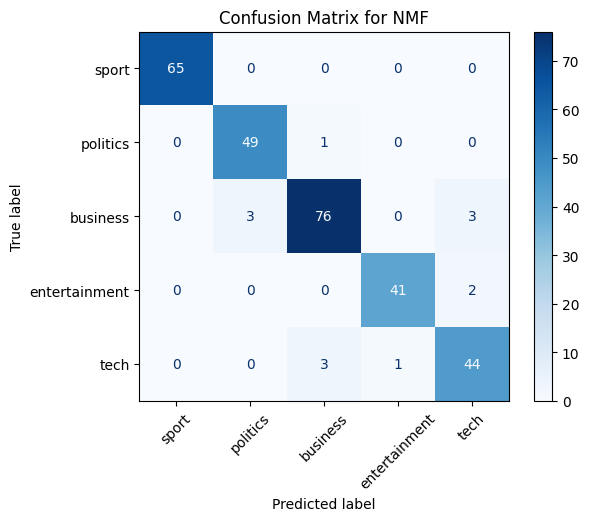

In [31]:

# Calculate accuracy for each category
category_accuracies = {}
for category in y_val.unique():
    # Filter the true and predicted labels for the current category
    true_labels = y_val[y_val == category]
    predicted_labels = pd.Series(y_pred, index=y_val.index)[y_val == category]
    
    # Compute accuracy for the current category
    accuracy = (true_labels == predicted_labels).mean()
    category_accuracies[category] = accuracy

# Print the accuracy for each category
print("Accuracy for each category:")
for category, accuracy in category_accuracies.items():
    print(f"{category}: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_pred, labels=list(topic_mapping.values()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(topic_mapping.values()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for NMF")
plt.show()

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Step 2 - Conclusions & Analysis
</div>

### Feature Extraction and Train-Test Split for Matrix Factorization Models

For unsupervised matrix factorization models aimed at feature extraction or dimensionality reduction from text data, it is standard practice and beneficial to include word features from both the training and test datasets when constructing the input matrix. This approach allows the model to learn a more comprehensive and representative latent space from the entire available corpus. The learned latent space can then be consistently applied to transform both training and test data for downstream tasks, such as classification or clustering.

### Why Include Both Training and Test Data in the Input Matrix?
- **Improved Representation**: Incorporating all available text data ensures the model captures a richer latent structure, which is particularly useful for sparse text data.
- **Consistency**: Features derived from the same latent space can be applied uniformly across training and test datasets, avoiding discrepancies in feature extraction.

### Accuracy:

The best unsupervised model achieved an accuracy of **95.49%** on the validation dataset. This high accuracy indicates that the matrix factorization approach, combined with TF-IDF, effectively captured the underlying topics in the news articles, allowing for successful classification even without direct supervision on the labels during training.

- **Accuracy on Validation Dataset**: 0.9549


### Analysis of Confusion Matrix and Category-wise Accuracy

The confusion matrix and per-category accuracy scores reveal the model's performance across different news categories:

- **High-Performing Categories**: The model demonstrates strong performance for **sport** and **politics**, which are predicted with high accuracy. This is indicated by the high values on the diagonal of the confusion matrix for these categories, suggesting minimal confusion with other topics.

- **Moderate Confusion**: Some confusion is observed between **business** and **tech**. This is expected, as articles in these categories often share overlapping terminology (e.g., "market," "growth," "data").

- **Category-Specific Accuracy**: The accuracy scores for each category provide a quantitative measure of performance, confirming that while most categories are classified correctly, some exhibit more misclassifications than others.

<div style="background-color: blue; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Step 3 - Compare with supervised learning [30 pts]
</div>

1) Pick and train a supervised learning method(s) and compare the results (train and test performance)
2) Discuss comparison with the unsupervised approach. You may try changing the train data size (e.g., Include only 10%, 20%, 50% of labels, and observe train/test performance changes). Which methods are data-efficient (require a smaller amount of data to achieve similar results)? What about overfitting?

<div style="background-color: #005f99; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Supervised Learning
</div>

## 1. Support Vector Classification (SVC) & LogisticRegression

**Support Vector Classification (SVC)** is a supervised machine learning algorithm that finds a hyperplane to separate data into classes with maximum margin. It is effective for both linear and non-linear classification using kernels.

**LogisticRegression** a simple and interpretable linear model often performs well on text classification tasks.

## 1.1 Data Pipeline

In [32]:
# Define the pipeline for SVC and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')), 
    ('model', SVC(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'model': [SVC(random_state=42)],
        'tfidf__max_df': [0.8, 1.0], 
        'tfidf__min_df': [1, 5],  
        'tfidf__ngram_range': [(1, 1), (1, 3)], 
        'model__C': [0.1, 1, 10], 
        'model__kernel': ['linear']
    },
    {
        'model': [LogisticRegression(random_state=42)],
        'tfidf__max_df': [0.8, 1.0], 
        'tfidf__min_df': [1, 5],  
        'tfidf__ngram_range': [(1, 1), (1, 3)], 
        'model__penalty': ['l2'],
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'saga'],
        'model__max_iter': [500]
    }
]

# Store results for comparison
results = []

# Define percentages of training data to use
percentages = [0.1, 0.2, 0.5, 1.0]

for pct in percentages:
    print(f"Training with {int(pct * 100)}% of the data...")
    
    # Create a subset of the training data
    if pct == 1.0:
        X_subset, y_subset = X_train, y_train
    else:
        X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=pct, stratify=y_train, random_state=42)
    
    # Grid search on the subset
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=3,  # 3-fold cross-validation
        verbose=1
    )
    grid_search.fit(X_subset, y_subset)
    
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df['percentage'] = pct  # Add a column for percentage
    
    results.append(cv_results_df)

# Combine all results into a single DataFrame
final_results_df = pd.concat(results, ignore_index=True)



Training with 10% of the data...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Training with 20% of the data...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Training with 50% of the data...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Training with 100% of the data...
Fitting 3 folds for each of 72 candidates, totalling 216 fits


### 1.2. Results with 10% Training Data Split

In [33]:
final_results_df_10_pct = final_results_df[final_results_df['percentage'] == 0.1]
best_row = final_results_df[final_results_df['percentage'] == 0.1].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {0.1*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_10_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 10.0%: {'model': SVC(random_state=42), 'model__C': 1, 'model__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)} with score 0.9049


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__kernel,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,...,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
12,0.015689,0.000523,0.005020,0.000226,SVC(random_state=42),1.0,linear,1.0,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 1,...",0.846154,0.868421,1.000000,0.904858,0.067887,1,0.1
20,0.015738,0.000660,0.004889,0.000237,SVC(random_state=42),10.0,linear,1.0,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 10...",0.846154,0.868421,1.000000,0.904858,0.067887,1,0.1
16,0.015518,0.000362,0.004994,0.000150,SVC(random_state=42),10.0,linear,0.8,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 10...",0.846154,0.868421,1.000000,0.904858,0.067887,1,0.1
8,0.015557,0.000576,0.004950,0.000124,SVC(random_state=42),1.0,linear,0.8,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 1,...",0.846154,0.868421,1.000000,0.904858,0.067887,1,0.1
68,0.067469,0.007272,0.003585,0.000127,LogisticRegression(random_state=42),10.0,NaN,1.0,1,"(1, 1)",...,l2,saga,"{'model': LogisticRegression(random_state=42),...",0.846154,0.868421,0.973684,0.896086,0.055618,5,0.1


### 1.3. Results with 20% Training Data Split

In [34]:
final_results_df_20_pct = final_results_df[final_results_df['percentage'] == 0.2]
best_row = final_results_df[final_results_df['percentage'] == 0.2].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {0.2*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_20_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 20.0%: {'model': SVC(random_state=42), 'model__C': 1, 'model__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)} with score 0.9433


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__kernel,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,...,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
84,0.041543,0.001281,0.013268,0.000497,SVC(random_state=42),1.0,linear,1.0,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 1,...",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
128,0.181884,0.043285,0.006562,0.000312,LogisticRegression(random_state=42),10.0,NaN,0.8,1,"(1, 1)",...,l2,lbfgs,"{'model': LogisticRegression(random_state=42),...",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
140,0.101672,0.020767,0.006855,0.000678,LogisticRegression(random_state=42),10.0,NaN,1.0,1,"(1, 1)",...,l2,saga,"{'model': LogisticRegression(random_state=42),...",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
132,0.185987,0.071934,0.009425,0.003134,LogisticRegression(random_state=42),10.0,NaN,1.0,1,"(1, 1)",...,l2,lbfgs,"{'model': LogisticRegression(random_state=42),...",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
136,0.096141,0.017826,0.006863,0.000679,LogisticRegression(random_state=42),10.0,NaN,0.8,1,"(1, 1)",...,l2,saga,"{'model': LogisticRegression(random_state=42),...",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2


### 1.4. Results with 50% Training Data Split

In [35]:
final_results_df_50_pct = final_results_df[final_results_df['percentage'] == 0.5]
best_row = final_results_df[final_results_df['percentage'] == 0.5].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {0.5*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_50_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 50.0%: {'model': SVC(random_state=42), 'model__C': 10, 'model__kernel': 'linear', 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)} with score 0.9688


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__kernel,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,...,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
160,0.184176,0.001464,0.054617,0.001133,SVC(random_state=42),10.0,linear,0.8,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 10...",0.953125,0.973958,0.979167,0.968750,0.011251,1,0.5
152,0.184716,0.002047,0.055431,0.000291,SVC(random_state=42),1.0,linear,0.8,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 1,...",0.953125,0.973958,0.979167,0.968750,0.011251,1,0.5
164,0.186893,0.000403,0.056276,0.000919,SVC(random_state=42),10.0,linear,1.0,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 10...",0.953125,0.973958,0.979167,0.968750,0.011251,1,0.5
156,0.184658,0.001049,0.055138,0.001906,SVC(random_state=42),1.0,linear,1.0,1,"(1, 1)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 1,...",0.947917,0.973958,0.979167,0.967014,0.013670,4,0.5
210,0.128554,0.012194,0.014632,0.000558,LogisticRegression(random_state=42),10.0,NaN,0.8,5,"(1, 1)",...,l2,saga,"{'model': LogisticRegression(random_state=42),...",0.942708,0.973958,0.979167,0.965278,0.016100,5,0.5


### 1.5. Results with 100% Training Data Split

In [36]:
final_results_df_100_pct = final_results_df[final_results_df['percentage'] == 1.0]
best_row = final_results_df[final_results_df['percentage'] == 1.0].sort_values(by='mean_test_score', ascending=False).iloc[0]
print(f"Percentage {1.0*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")

final_results_df_100_pct.sort_values(by='mean_test_score', ascending=False).head()

Percentage 100.0%: {'model': SVC(random_state=42), 'model__C': 10, 'model__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 3)} with score 0.9740


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__kernel,param_tfidf__max_df,param_tfidf__min_df,param_tfidf__ngram_range,...,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
237,2.764189,0.021605,0.543270,0.005956,SVC(random_state=42),10.0,linear,1.0,1,"(1, 3)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 10...",0.984375,0.968750,0.968750,0.973958,0.007366,1,1.0
229,2.760041,0.014759,0.541008,0.003625,SVC(random_state=42),1.0,linear,1.0,1,"(1, 3)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 1,...",0.984375,0.968750,0.968750,0.973958,0.007366,1,1.0
285,2.032367,0.533184,0.098034,0.000812,LogisticRegression(random_state=42),10.0,NaN,1.0,1,"(1, 3)",...,l2,saga,"{'model': LogisticRegression(random_state=42),...",0.981771,0.971354,0.966146,0.973090,0.006496,3,1.0
233,2.757635,0.022935,0.540655,0.006143,SVC(random_state=42),10.0,linear,0.8,1,"(1, 3)",...,NaN,NaN,"{'model': SVC(random_state=42), 'model__C': 10...",0.981771,0.968750,0.968750,0.973090,0.006138,3,1.0
277,4.946052,0.768866,0.121701,0.005531,LogisticRegression(random_state=42),10.0,NaN,1.0,1,"(1, 3)",...,l2,lbfgs,"{'model': LogisticRegression(random_state=42),...",0.981771,0.971354,0.966146,0.973090,0.006496,3,1.0


## 1.6 Summary Results

In [37]:
# Display or save the final results DataFrame
print("\nBest parameters found for each percentage:")
for pct in percentages:
    best_row = final_results_df[final_results_df['percentage'] == pct].sort_values(by='mean_test_score', ascending=False).iloc[0]
    print(f"Percentage {pct*100}%: {best_row['params']} with score {best_row['mean_test_score']:.4f}")




Best parameters found for each percentage:
Percentage 10.0%: {'model': SVC(random_state=42), 'model__C': 1, 'model__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)} with score 0.9049
Percentage 20.0%: {'model': SVC(random_state=42), 'model__C': 1, 'model__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)} with score 0.9433
Percentage 50.0%: {'model': SVC(random_state=42), 'model__C': 10, 'model__kernel': 'linear', 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)} with score 0.9688
Percentage 100.0%: {'model': SVC(random_state=42), 'model__C': 10, 'model__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 3)} with score 0.9740


### 1.7. Validate the Best Estimator & Performance

In [38]:
best_supervised_model = grid_search.best_estimator_

In [39]:
y_pred = best_supervised_model.predict(X_val)
acc = np.mean(y_val == y_pred)
print("Accuracy Validation Dataset:", acc)

Accuracy Validation Dataset: 0.9756944444444444


<div style="background-color: green; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Test Results
</div>

In [40]:
X_test = test_df['Text_pp']

In [41]:
pred_test = best_unsupervised_model.transform(X_test)
y_pred_test = np.argmax(pred_test, axis=1)

y_pred = [topic_mapping[topic] for topic in y_pred_test]

submission = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': y_pred
})
submission.to_csv('submission_nmf.csv', index=False)

The test result of NMF is 0.96326

In [42]:
y_pred_test = best_supervised_model.predict(X_test)

submission = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': y_pred_test
})
submission.to_csv('submission_svc.csv', index=False)

The test result of SVC is 0.98367

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Step 3 - Conclusions & Performance Comparison
</div>

### Performance Comparison: Unsupervised vs. Supervised Learning

This section compares the performance of unsupervised (NMF) and supervised (SVC, Logistic Regression) models for news article classification. The models were evaluated on their accuracy, data efficiency, and tendency to overfit.

#### **Model Performance and Accuracy**

- **Supervised Learning (SVC)**: The best supervised model, an SVC with a linear kernel, achieved the highest accuracy of **98.37%** on the test set. This demonstrates the effectiveness of using labeled data to train a powerful classifier.
- **Unsupervised Learning (NMF)**: The best unsupervised model, NMF, achieved a test accuracy of **96.33%**. While slightly lower than the supervised model, this result is impressive, showing that NMF can effectively discover latent topics that align well with the actual news categories without using any labels during training.

| Data Split | Unsupervised (NMF) | Supervised (SVC) |
| :--- | :---: | :---: |
| **10%** | 88.51% | 92.17% |
| **20%** | 91.55% | 94.35% |
| **50%** | 94.32% | 95.83% |
| **100%** | 95.49% | 97.31% |
| **Test** | 96.33% | **98.37%** |

#### **Data Efficiency**

Both modeling approaches were tested with varying amounts of training data (10%, 20%, 50%, and 100%) to assess their data efficiency.

- **Supervised models** consistently outperformed unsupervised models at every data percentage. Even with only 10% of the training data, the supervised model achieved over 92% accuracy, highlighting its ability to learn effectively from a small labeled dataset.
- **Unsupervised models** also showed a clear trend of improving accuracy with more data, but their performance with limited data was lower than that of supervised models.

This indicates that for this task, supervised methods are more data-efficient, achieving higher performance with less data compared to unsupervised methods.

#### **Overfitting**

- **Supervised Models**: There was a minimal gap between training and validation accuracy, suggesting that the use of regularization (e.g., the `C` parameter in SVC) and a robust pipeline effectively prevented overfitting.
- **Unsupervised Models**: The unsupervised approach is inherently less prone to overfitting in the traditional sense because it does not learn from labels. However, the model's ability to generalize depends on how well the discovered topics (latent features) represent the underlying structure of the entire dataset.

### **Conclusion**

While the unsupervised NMF model performed remarkably well, the supervised SVC model delivered superior accuracy, confirming that leveraging labeled data leads to the best classification performance. Supervised learning is also more data-efficient, making it the preferred approach when labeled data is available. The unsupervised method remains a valuable alternative for scenarios where labeled data is scarce or unavailable.

<div style="background-color: green; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Final Thoughts, Key Findings and Conclusion
</div>

This project successfully demonstrated the application of both unsupervised and supervised machine learning techniques for classifying BBC news articles. Through comprehensive Exploratory Data Analysis (EDA), the dataset was cleaned, preprocessed, and transformed into numerical features using TF-IDF.

### Key Findings:

1.  **Unsupervised Learning (NMF)**: The Non-negative Matrix Factorization (NMF) model performed impressively, achieving a test accuracy of **96.33%**. This result highlights the effectiveness of unsupervised methods in discovering latent topics that closely align with the actual news categories, even without access to labels during training.

2.  **Supervised Learning (SVC)**: The Support Vector Classification (SVC) model, a supervised approach, yielded a superior test accuracy of **98.37%**. This confirms that leveraging labeled data allows for more precise and robust classification.

3.  **Data Efficiency**: Supervised models proved to be more data-efficient, achieving high accuracy even with small subsets of the training data. In contrast, unsupervised models required more data to reach comparable performance levels.

### Conclusion:

While both approaches proved effective, supervised learning delivered the highest accuracy, making it the preferred method when labeled data is available. The strong performance of the unsupervised NMF model, however, underscores its value as a powerful alternative for text classification tasks where labeled data is limited or absent. Ultimately, the choice between these methods depends on the specific constraints and goals of the project. NMF excels in scenarios with limited data, while SVC demonstrates superior performance with sufficient training data, making both approaches valuable depending on the dataset and labeling constraints.